In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


## Carga de datasets

In [14]:
siniestros_hechos = pd.read_csv('../data/processed/siniestros_hechos.csv')
siniestros_victimas = pd.read_csv('../data/processed/siniestros_victimas.csv')

In [3]:
siniestros_hechos.head()

,Id,N_Victimas,Fecha,Franja_Hora,Tipo_Calle,Calle,Cruce,Comuna,Longitud,Latitud,Participantes,Victima,Acusado,Dataset,semaforo_30m,semaforo_15m
0,2016-0001,1,2016-01-01,4,AVENIDA,PIEDRA BUENA AV.,True,8,-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,homicidio,True,True
1,2016-0002,1,2016-01-02,1,GRAL PAZ,"PAZ, GRAL. AV.",True,9,-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,homicidio,False,False
2,2016-0003,1,2016-01-03,7,AVENIDA,ENTRE RIOS AV.,False,1,-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO,homicidio,False,False
3,2016-0005,1,2016-01-21,5,AVENIDA,SAN JUAN AV.,True,1,-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS,homicidio,True,True
4,2016-0008,1,2016-01-24,18,AVENIDA,27 DE FEBRERO AV.,True,8,-58.444513,-34.684759,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO,homicidio,False,False


In [4]:
siniestros_hechos.dtypes

Id                object
N_Victimas         int64
Fecha             object
Franja_Hora        int64
Tipo_Calle        object
Calle             object
Cruce               bool
Comuna             int64
Longitud         float64
Latitud          float64
Participantes     object
Victima           object
Acusado           object
Dataset           object
semaforo_30m        bool
semaforo_15m        bool
dtype: object

In [5]:
siniestros_victimas.dtypes

Id_Hecho    object
Sexo        object
Edad        object
dtype: object

## siniestros_hechos y siniestros_victimas

In [6]:
siniestros_hechos.describe()

,N_Victimas,Franja_Hora,Comuna,Longitud,Latitud
count,22897.000000,22897.000000,22897.000000,22897.000000,22897.000000
mean,1.159016,13.714242,7.916103,-58.442397,-34.612280
std,0.546973,5.462827,4.580735,0.044398,0.031604
min,1.000000,0.000000,1.000000,-58.531114,-34.705250
25%,1.000000,10.000000,4.000000,-58.477042,-34.632930
50%,1.000000,14.000000,8.000000,-58.441801,-34.613051
75%,1.000000,18.000000,12.000000,-58.405162,-34.591189
max,16.000000,23.000000,15.000000,-58.353456,-34.534654


In [7]:
siniestros_victimas.describe()

,Id_Hecho,Sexo,Edad
count,23786,23786,23786
unique,20787,2,100
top,LC-2019-0188476,MASCULINO,28
freq,16,16101,829


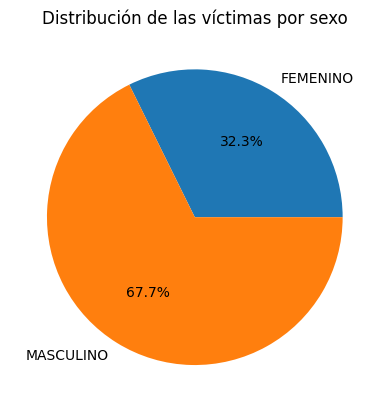

In [4]:
# Recuento de las víctimas por sexo
victimas_por_sexo = siniestros_victimas.groupby("Sexo").size()

# Creación del gráfico circular
plt.pie(victimas_por_sexo, labels=victimas_por_sexo.index, autopct="%1.1f%%")
plt.title("Distribución de las víctimas por sexo")
plt.show()


La mayoría de las victimas son varones

Text(0.5, 0, 'conteo')

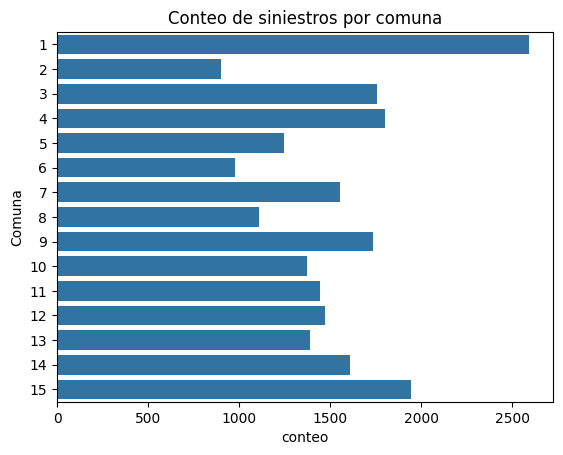

In [7]:
sns.countplot(y='Comuna', data=siniestros_hechos, orient='h')

plt.title('Conteo de siniestros por comuna')
plt.ylabel('Comuna')
plt.xlabel('conteo')


La comuna más peligrosa es la 1

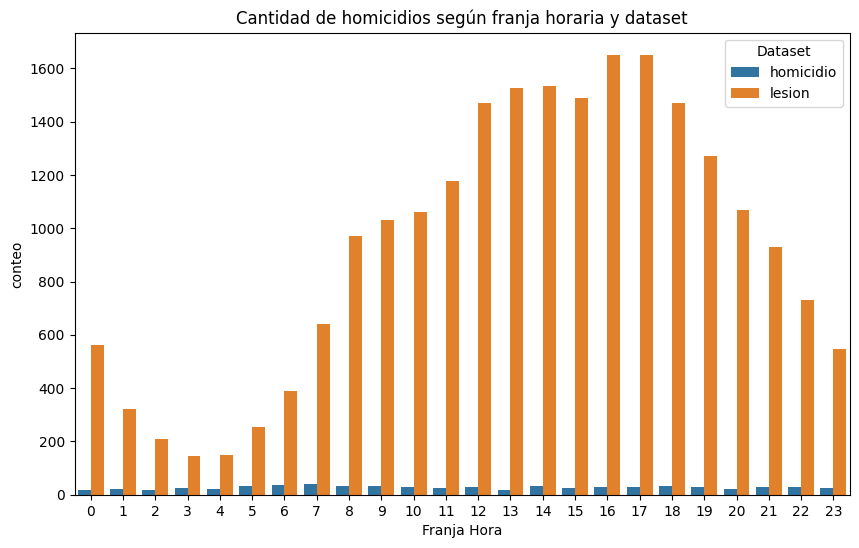

In [49]:
# Obtener un array de las etiquetas de franja horaria únicas
franjas_horaria_unicas = sorted(siniestros_hechos['Franja_Hora'].unique())

# Create a new figure with a larger picture frame
fig, ax = plt.subplots(figsize=(10, 6))

# Create the stacked bar plot
sns.countplot(x='Franja_Hora', data=siniestros_hechos, hue='Dataset', order=franjas_horaria_unicas, ax=ax)

# Set the title and labels of the plot
ax.set_title("Cantidad de homicidios según franja horaria y dataset")
ax.set_ylabel('conteo')
ax.set_xlabel('Franja Hora')

# Show the plot
plt.show()

Se aprecia que los siniestros de tipo lesión tienden a ser por la tarde, mientras que los accidentes mortales tienden a ser en la mañana.

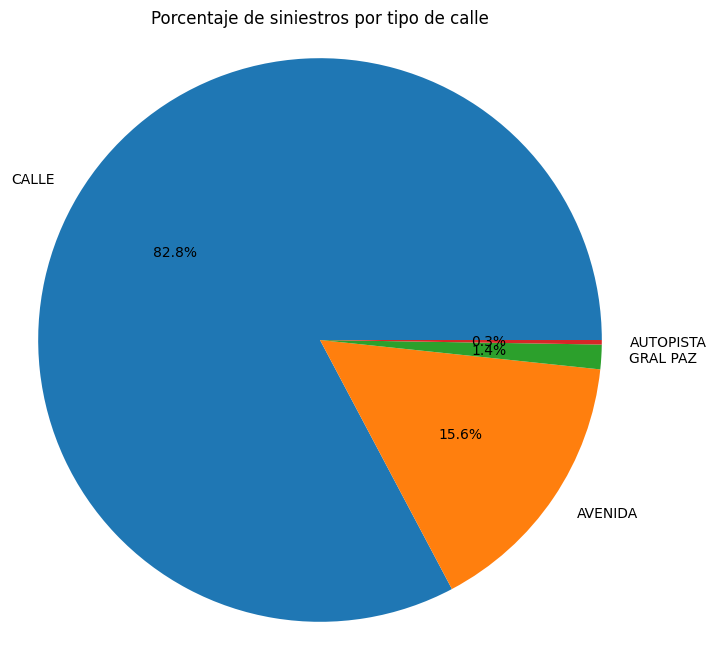

In [19]:
# Calcular el conteo de siniestros por tipo de calle
conteo_siniestros_por_tipo_calle = siniestros_hechos['Tipo_Calle'].value_counts()

# Calcular los porcentajes del total
porcentajes_total = conteo_siniestros_por_tipo_calle.div(conteo_siniestros_por_tipo_calle.sum())

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(porcentajes_total, labels=porcentajes_total.index, autopct='%1.1f%%')
plt.title('Porcentaje de siniestros por tipo de calle')
plt.axis('equal')
plt.show()

La mayoría de los siniestros ocurre en calles, le siguen las avenidas, General Paz, y finalmente las autopistas.

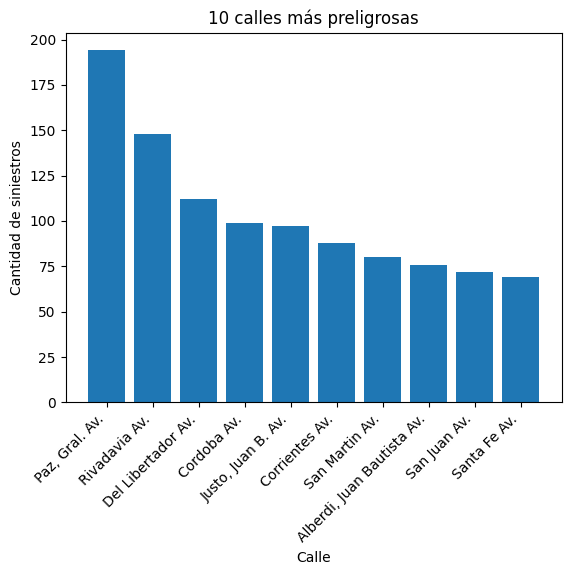

In [37]:
# Filter out 'SD' values from the 'Calle' column
calles_sin_sd = siniestros_hechos['Calle'].replace('SD', np.nan)

# Count the number of non-'SD' values for each street
calles_peligrosas = calles_sin_sd.value_counts().head(10)

# Create the bar plot
plt.bar(calles_peligrosas.index, calles_peligrosas.values)
plt.xlabel('Calle')
plt.ylabel('Cantidad de siniestros')
plt.title('10 calles más preligrosas')
plt.xticks(rotation=45, ha='right')
plt.show()

A pesar del gráfico anterior, las vías con mayor número de incidentes corresponden todas a tipo avenida. Esto puede deberse a que corresponden a las avenidas más largas de la ciudad. 

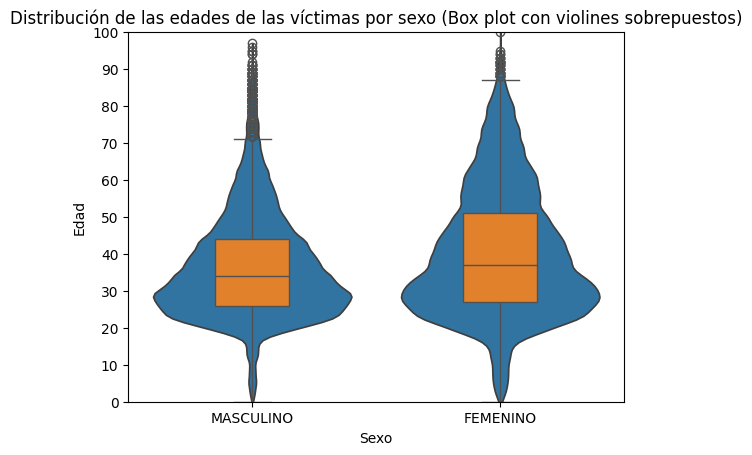

In [32]:
# Convertir la columna 'Edad' a un tipo de dato entero y eliminar los valores no numéricos
siniestros_victimas['Edad'] = siniestros_victimas['Edad'].apply(lambda x: int(x) if x.isdigit() else None)

# Ordenar los datos en la columna 'Edad' y mover los valores NaN al principio
siniestros_victimas_ordenadas = siniestros_victimas.sort_values(by='Edad', na_position='first')

# Crear el gráfico de cajas y bigotes con violines sobrepuestos
sns.violinplot(x="Sexo", y="Edad", data=siniestros_victimas_ordenadas, inner=None, bw_adjust=0.5, cut=0, scale='width')

# Agregar las cajas y bigotes
sns.boxplot(x="Sexo", y="Edad", data=siniestros_victimas_ordenadas, width=0.3, ax=plt.gca())

# Set the limits of the y-axis
plt.ylim(0, 100)

# Set the ticks for the y-axis in ascending order
plt.yticks(range(0, 101, 10))

# Set the title of the plot
plt.title("Distribución de las edades de las víctimas por sexo (Box plot con violines sobrepuestos)")

# Show the plot
plt.show()

Las victimas mujeres tienden a ser mayores en promedio que los varones. Aunque la mayoría de los datos de la muestra, para ambos sexos, se concentra entre los 20 y los 50 años de edad.

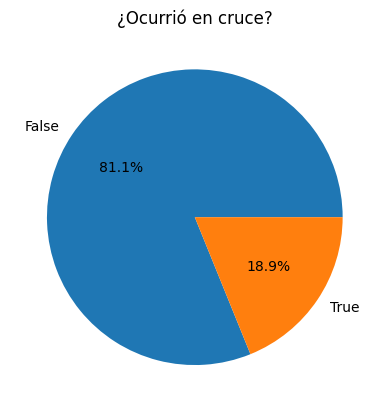

In [34]:
# Recuento de las víctimas por sexo
siniestros_cruce = siniestros_hechos.groupby("Cruce").size()

# Creación del gráfico circular
plt.pie(siniestros_cruce, labels=siniestros_cruce.index, autopct="%1.1f%%")
plt.title("¿Ocurrió en cruce?")
plt.show()

La mayoría de los siniestros no ocurren en cruces

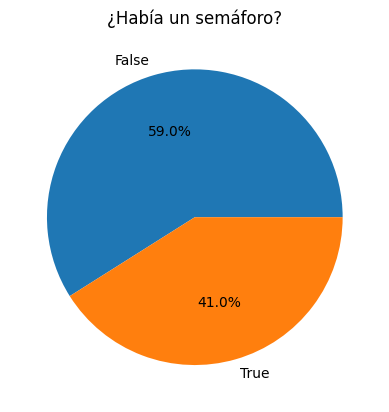

In [36]:
# Recuento de las víctimas por sexo
siniestros_semaforo = siniestros_hechos.groupby("semaforo_15m").size()

# Creación del gráfico circular
plt.pie(siniestros_semaforo, labels=siniestros_semaforo.index, autopct="%1.1f%%")
plt.title("¿Había un semáforo?")
plt.show()

La mayoría de los siniestros ocurren lejos de un semáforo

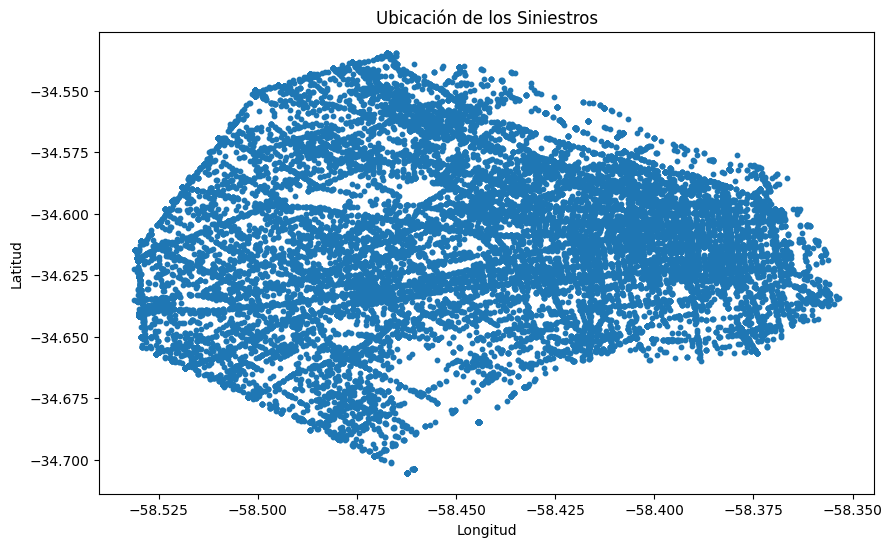

In [45]:
# Crear el gráfico de dispersión de 'Latitud' vs 'Longitud'
plt.figure(figsize=(10, 6))
plt.scatter(siniestros_hechos['Longitud'], siniestros_hechos['Latitud'], s=10)
plt.title('Ubicación de los Siniestros')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

La distribución de los datos tiene la forma de la Ciudad Autónoma de Buenos Aires, por lo que no hay datos de otras circunscripciones